In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [2]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//figures//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Shuffling training testing

In [8]:
dataset=torch.cat((train_dataset.data,test_dataset.data),0)
target=torch.cat((train_target.data,test_target.data),0)

In [9]:
permutations=torch.randperm(dataset.shape[0])

In [10]:
dataset=dataset[permutations]
target=target[permutations]

In [11]:
train_dataset=Variable(dataset[:316])
train_target=Variable(target[:316])
test_dataset=Variable(dataset[316:])
test_target=Variable(target[316:])

# Normalization

In [12]:
train_dataset.shape

torch.Size([316, 28, 50])

In [13]:
test_dataset.shape

torch.Size([100, 28, 50])

In [14]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [15]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

0


  4%|▍         | 13/300 [00:00<00:02, 124.00it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 114.65it/s]


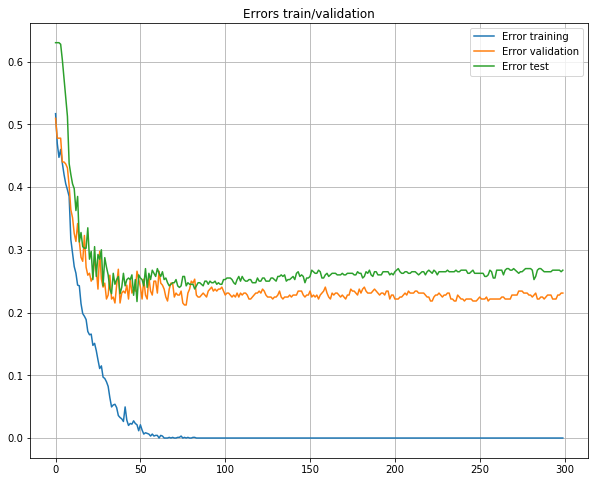

Performance train: 0.0
Performance validation: 0.224725738397
Performance test: 0.265233333333
1


  5%|▌         | 15/300 [00:00<00:01, 142.84it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.93it/s]


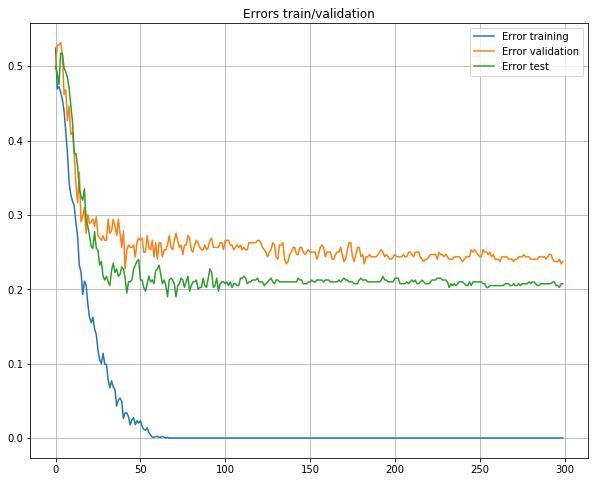

Performance train: 0.0
Performance validation: 0.243291139241
Performance test: 0.2075
2


  5%|▍         | 14/300 [00:00<00:02, 138.69it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.01it/s]


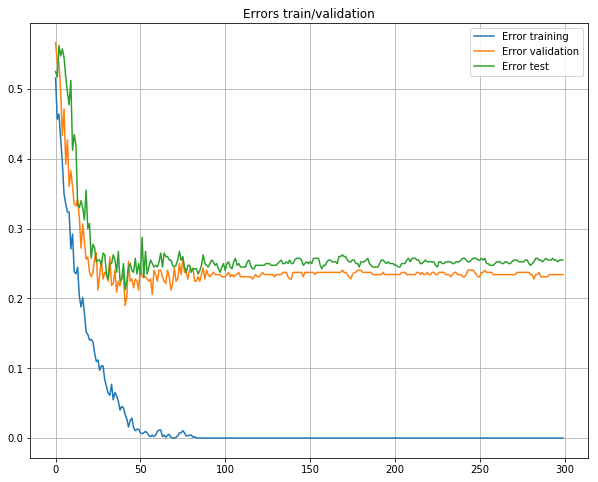

Performance train: 0.0
Performance validation: 0.235021097046
Performance test: 0.253166666667
3


  5%|▌         | 15/300 [00:00<00:01, 147.39it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 108.16it/s]


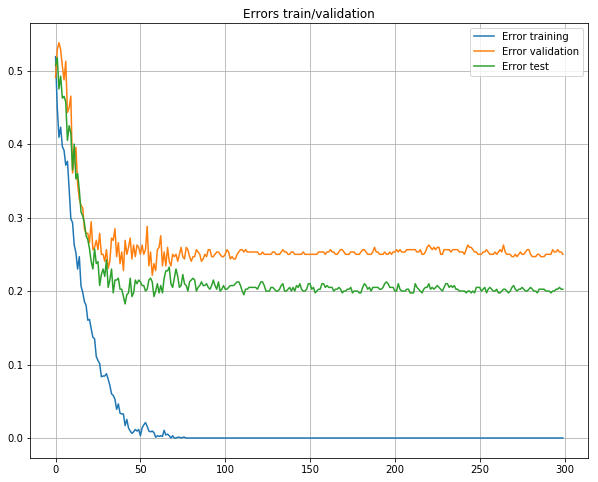

Performance train: 0.0
Performance validation: 0.252616033755
Performance test: 0.202
4


  5%|▍         | 14/300 [00:00<00:02, 131.15it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 105.69it/s]


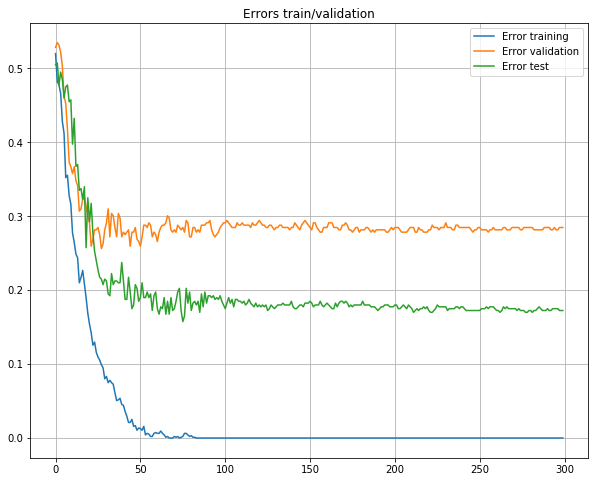

Performance train: 0.0
Performance validation: 0.283459915612
Performance test: 0.174366666667
5


  5%|▌         | 15/300 [00:00<00:01, 144.59it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.45it/s]


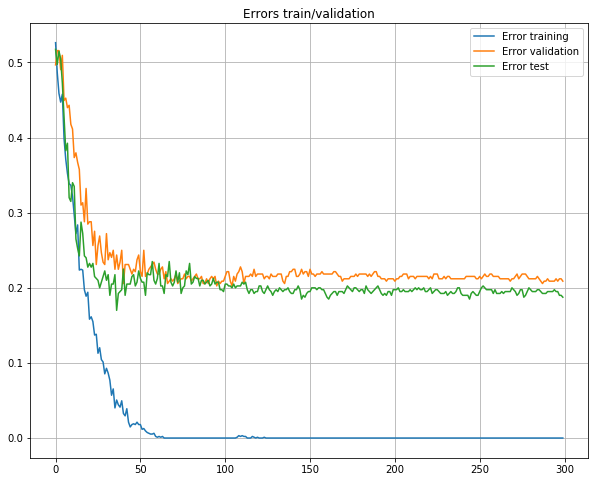

Performance train: 0.0
Performance validation: 0.213080168776
Performance test: 0.194266666667
6


  3%|▎         | 9/300 [00:00<00:03, 89.92it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 107.36it/s]


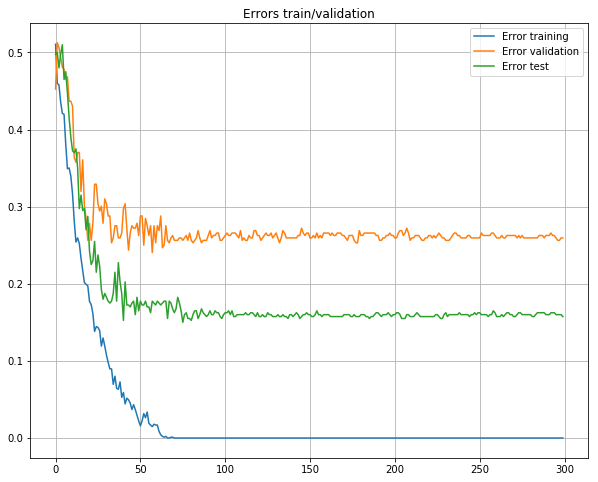

Performance train: 0.0
Performance validation: 0.261139240506
Performance test: 0.1601
7


  5%|▍         | 14/300 [00:00<00:02, 132.47it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 108.96it/s]


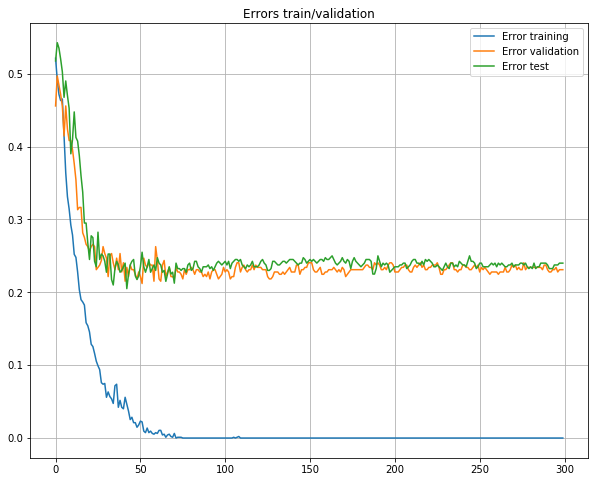

Performance train: 0.0
Performance validation: 0.232194092827
Performance test: 0.237366666667
8


  5%|▍         | 14/300 [00:00<00:02, 136.92it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 109.75it/s]


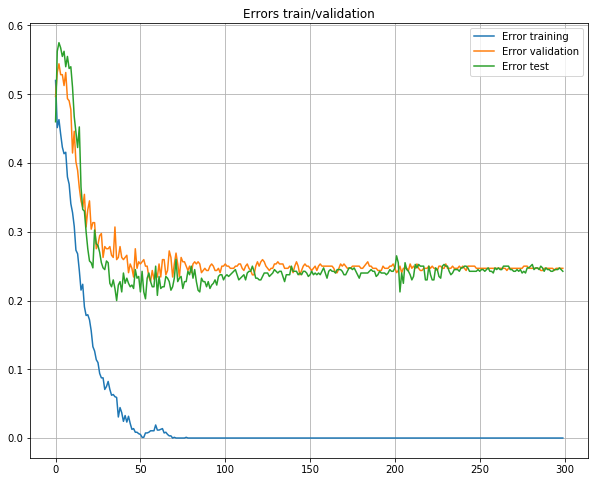

Performance train: 0.0
Performance validation: 0.247215189873
Performance test: 0.245066666667
9


  3%|▎         | 8/300 [00:00<00:03, 79.76it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 104.06it/s]


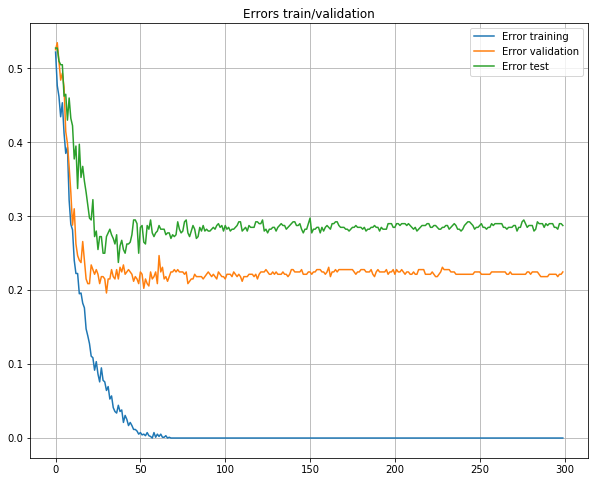

Performance train: 0.0
Performance validation: 0.222742616034
Performance test: 0.2868
10


  5%|▌         | 15/300 [00:00<00:02, 141.65it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.18it/s]


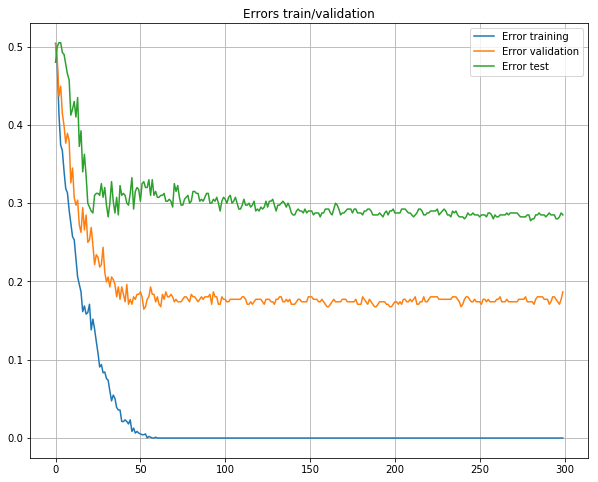

Performance train: 0.0
Performance validation: 0.176286919831
Performance test: 0.284966666667
11


  5%|▌         | 15/300 [00:00<00:02, 142.48it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.46it/s]


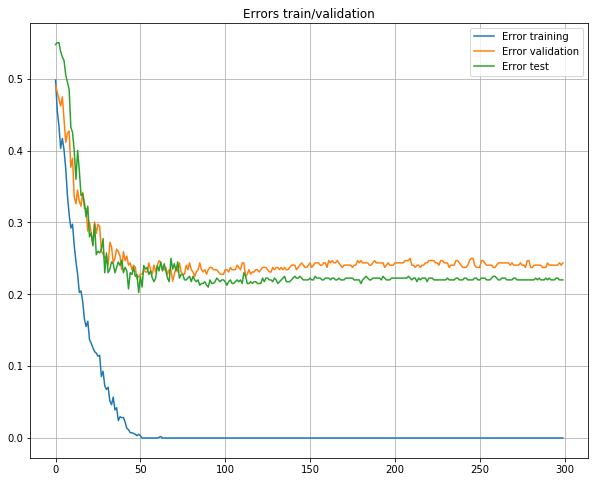

Performance train: 0.0
Performance validation: 0.24164556962
Performance test: 0.2209
12


  5%|▌         | 16/300 [00:00<00:01, 152.18it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 103.14it/s]


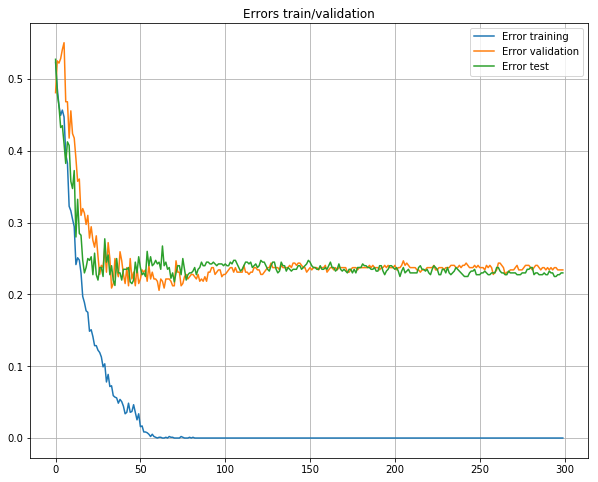

Performance train: 0.0
Performance validation: 0.237046413502
Performance test: 0.230266666667
13


  3%|▎         | 10/300 [00:00<00:03, 92.80it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 87.13it/s] 


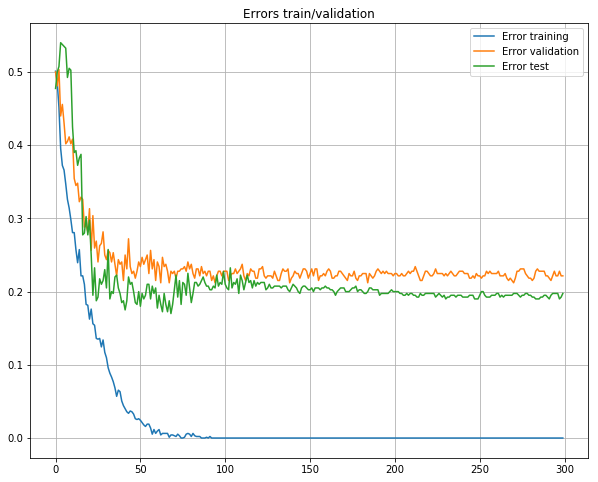

Performance train: 0.0
Performance validation: 0.223248945148
Performance test: 0.1943
14


  5%|▍         | 14/300 [00:00<00:02, 136.97it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 102.23it/s]


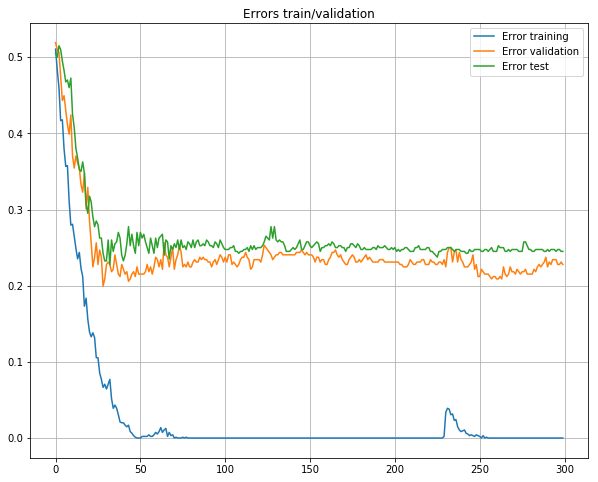

Performance train: 0.00419127988748
Performance validation: 0.224388185654
Performance test: 0.246933333333
15


  5%|▍         | 14/300 [00:00<00:02, 133.82it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 106.83it/s]


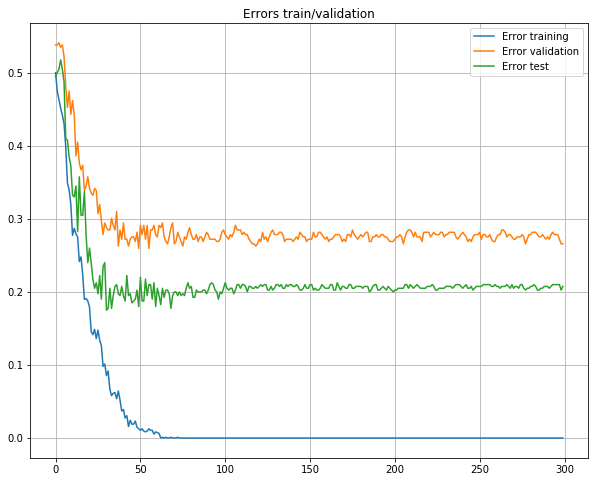

Performance train: 0.0
Performance validation: 0.276582278481
Performance test: 0.207133333333
16


  5%|▍         | 14/300 [00:00<00:02, 134.31it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 75.77it/s] 


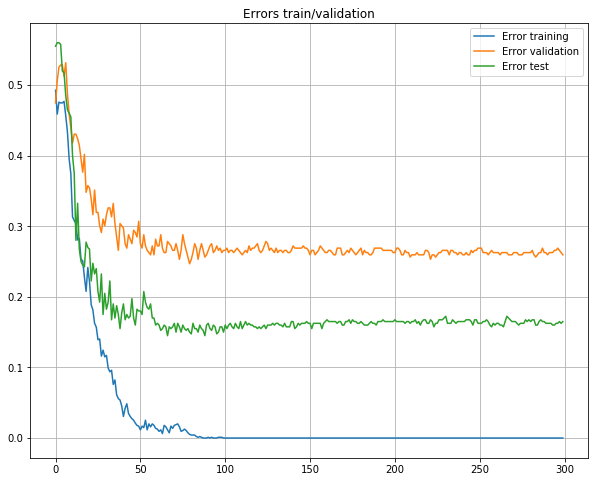

Performance train: 0.0
Performance validation: 0.262784810127
Performance test: 0.164266666667
17


  4%|▎         | 11/300 [00:00<00:02, 102.23it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.02it/s]


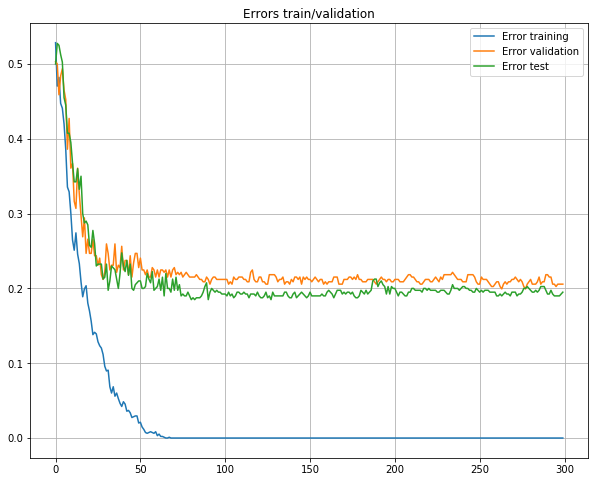

Performance train: 0.0
Performance validation: 0.210379746835
Performance test: 0.195966666667
18


  5%|▌         | 15/300 [00:00<00:01, 143.73it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.68it/s]


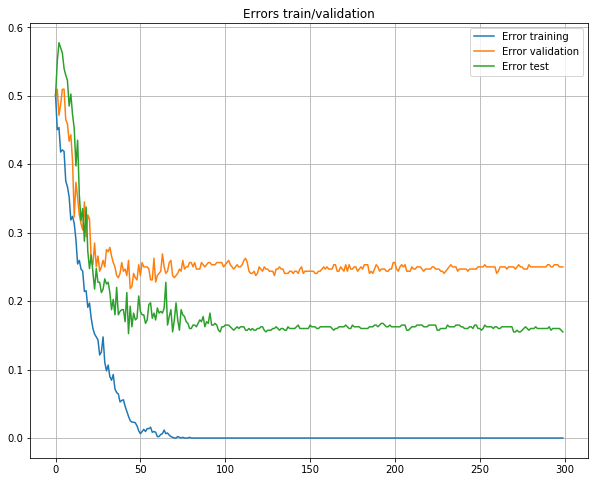

Performance train: 0.0
Performance validation: 0.248860759494
Performance test: 0.160666666667
19


  5%|▌         | 16/300 [00:00<00:01, 150.57it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.86it/s]


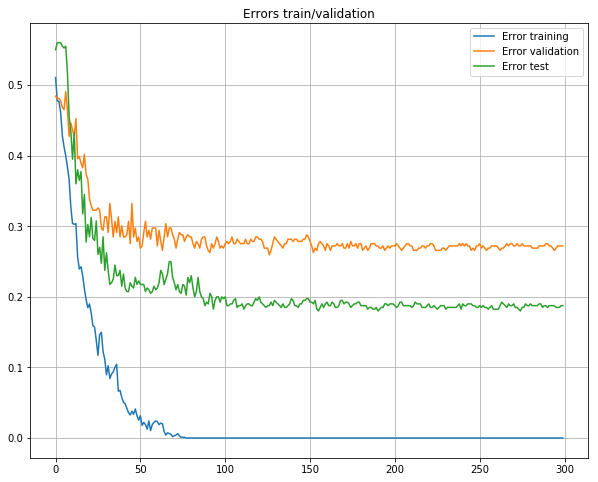

Performance train: 0.0
Performance validation: 0.271139240506
Performance test: 0.1865
20


  5%|▌         | 15/300 [00:00<00:01, 146.28it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 107.88it/s]


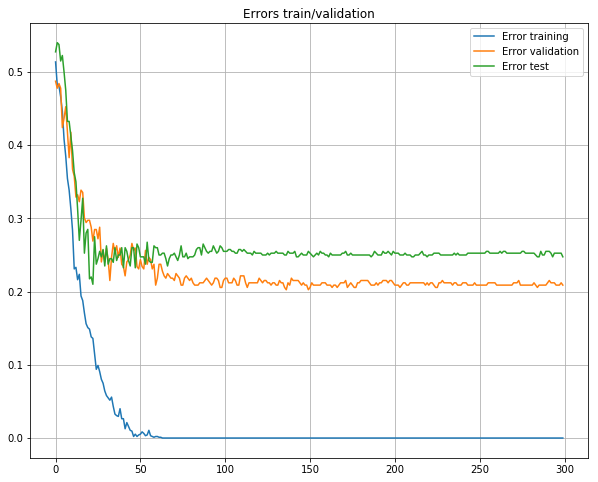

Performance train: 0.0
Performance validation: 0.210168776371
Performance test: 0.252033333333
21


  5%|▍         | 14/300 [00:00<00:02, 137.41it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.78it/s]


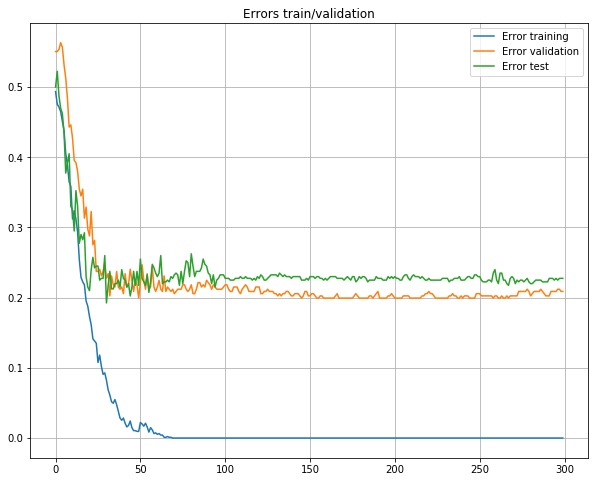

Performance train: 0.0
Performance validation: 0.20388185654
Performance test: 0.226
22


  5%|▌         | 15/300 [00:00<00:01, 149.83it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 110.63it/s]


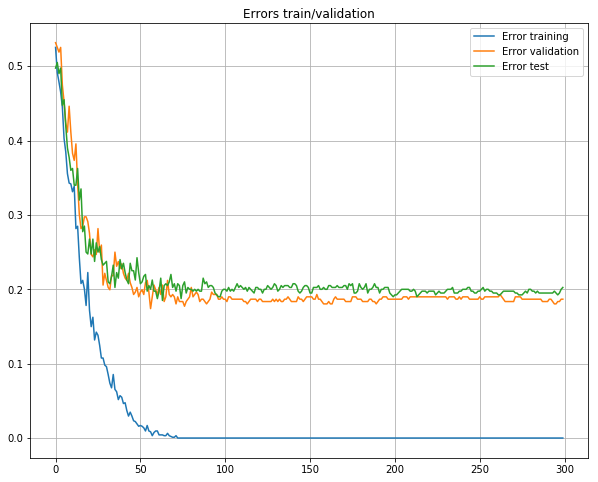

Performance train: 0.0
Performance validation: 0.187341772152
Performance test: 0.196866666667
23


  5%|▍         | 14/300 [00:00<00:02, 137.07it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.07it/s]


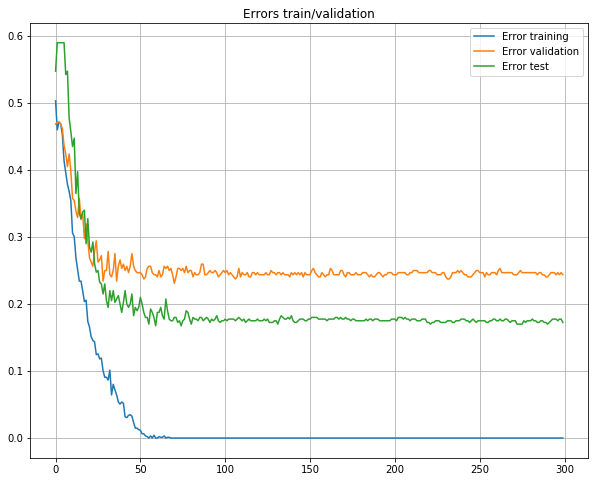

Performance train: 0.0
Performance validation: 0.245443037975
Performance test: 0.174566666667
24


  5%|▌         | 15/300 [00:00<00:01, 149.33it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 110.53it/s]


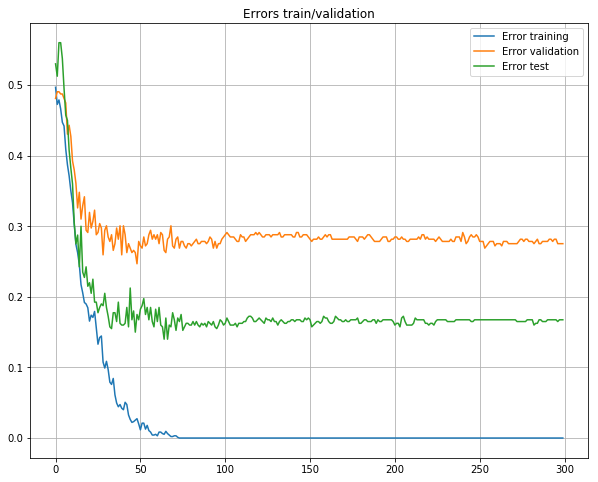

Performance train: 0.0
Performance validation: 0.279029535865
Performance test: 0.1667
25


  3%|▎         | 9/300 [00:00<00:03, 88.30it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.31it/s]


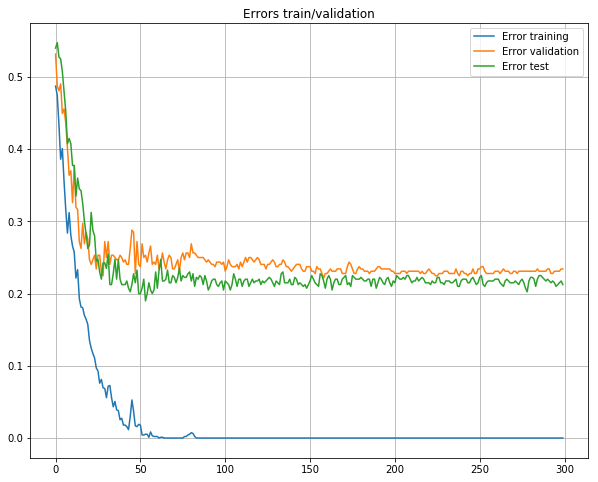

Performance train: 0.0
Performance validation: 0.23029535865
Performance test: 0.216766666667
26


  5%|▌         | 15/300 [00:00<00:01, 148.05it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.15it/s]


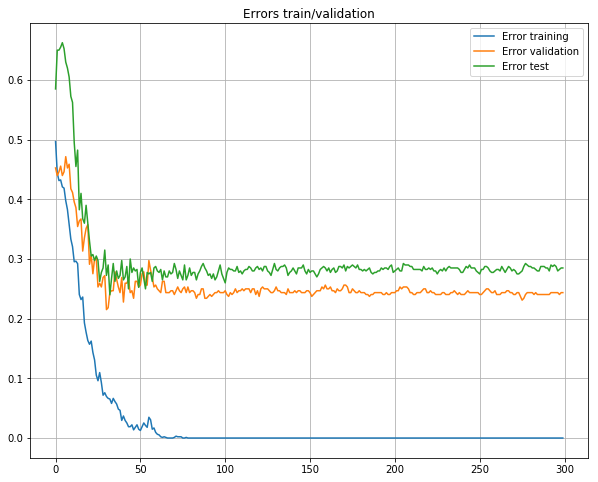

Performance train: 0.0
Performance validation: 0.242573839662
Performance test: 0.283266666667
27


  5%|▌         | 16/300 [00:00<00:01, 153.27it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.83it/s]


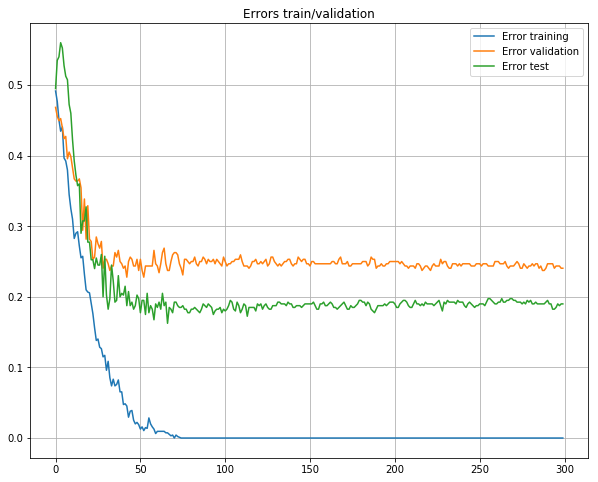

Performance train: 0.0
Performance validation: 0.244978902954
Performance test: 0.191233333333
28


  5%|▌         | 16/300 [00:00<00:01, 154.02it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.13it/s]


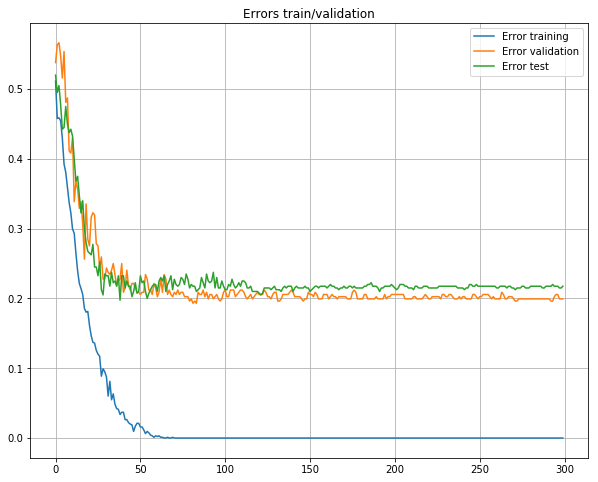

Performance train: 0.0
Performance validation: 0.201139240506
Performance test: 0.216766666667
29


  5%|▌         | 15/300 [00:00<00:01, 142.82it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.78it/s]


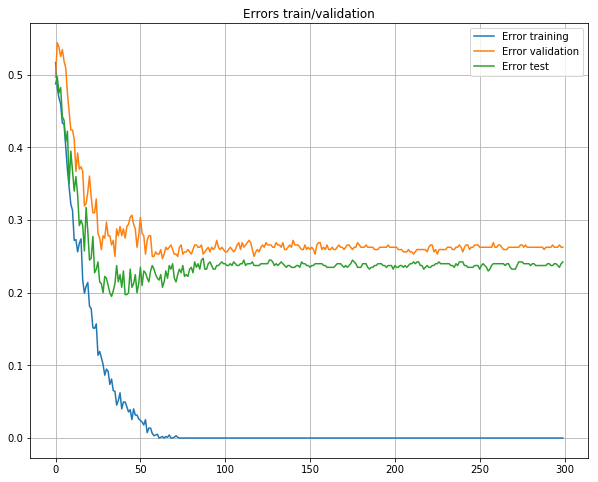

Performance train: 0.0
Performance validation: 0.262573839662
Performance test: 0.2383
30


  5%|▌         | 15/300 [00:00<00:01, 144.70it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 88.59it/s] 


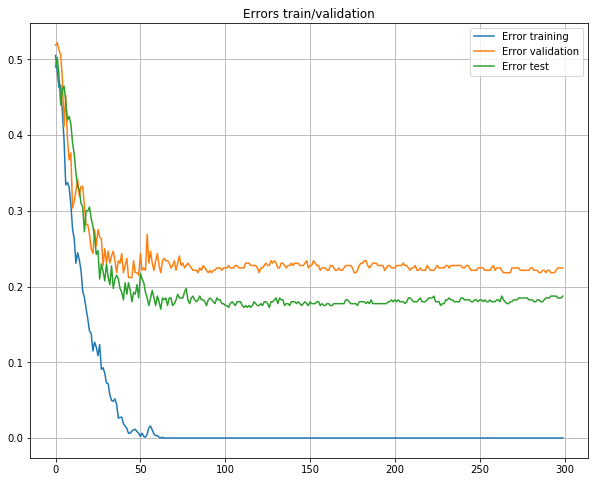

Performance train: 0.0
Performance validation: 0.223291139241
Performance test: 0.182266666667
31


  4%|▎         | 11/300 [00:00<00:02, 104.19it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 111.12it/s]


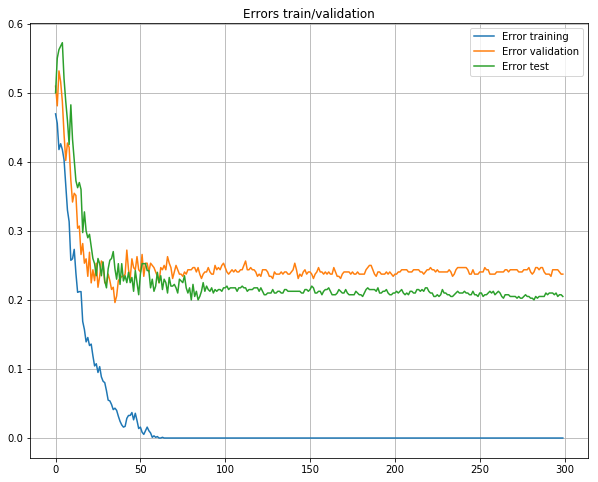

Performance train: 0.0
Performance validation: 0.241603375527
Performance test: 0.207366666667
32


  5%|▌         | 15/300 [00:00<00:01, 145.37it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 115.31it/s]


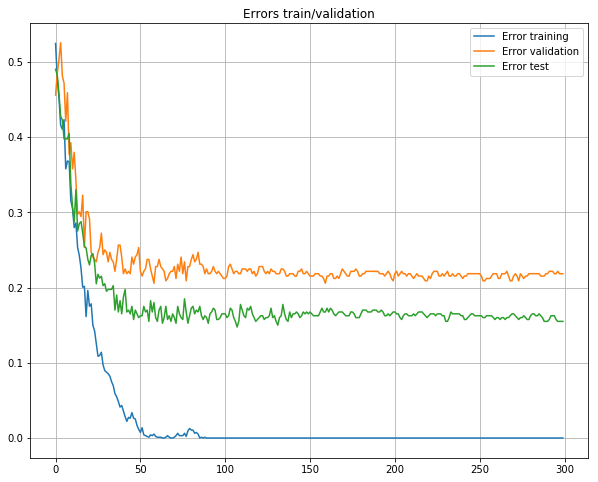

Performance train: 0.0
Performance validation: 0.216540084388
Performance test: 0.160966666667
33


  5%|▌         | 15/300 [00:00<00:01, 148.14it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.95it/s]


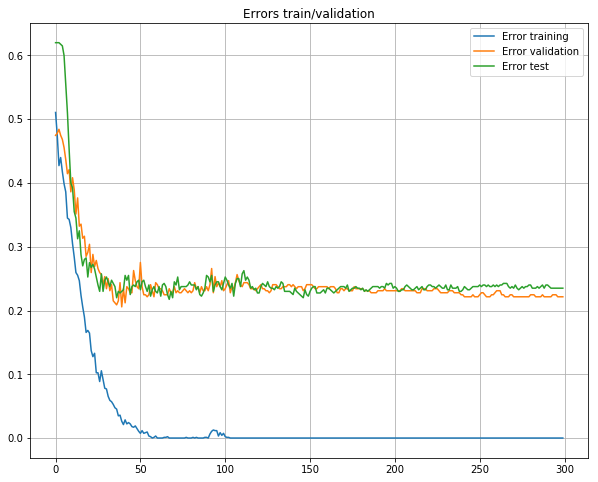

Performance train: 0.0
Performance validation: 0.224345991561
Performance test: 0.236833333333
34


  5%|▌         | 15/300 [00:00<00:01, 149.00it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 106.58it/s]


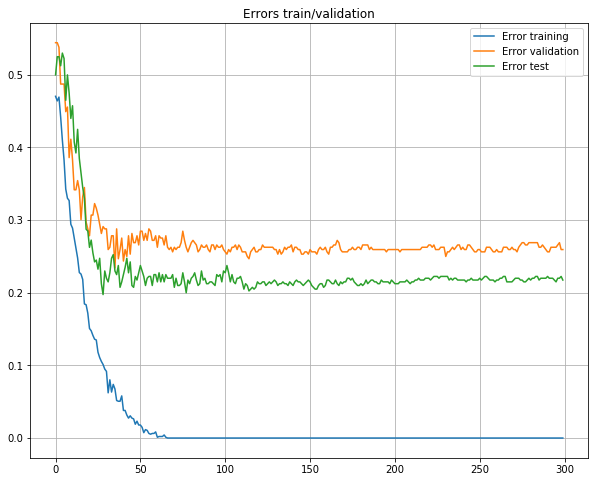

Performance train: 0.0
Performance validation: 0.261561181435
Performance test: 0.218966666667
35


  5%|▌         | 15/300 [00:00<00:01, 144.81it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 110.05it/s]


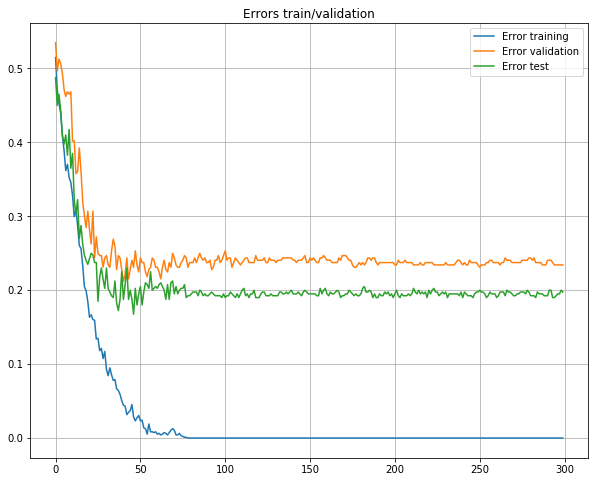

Performance train: 0.0
Performance validation: 0.237130801688
Performance test: 0.195
36


  5%|▌         | 16/300 [00:00<00:01, 153.55it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.42it/s]


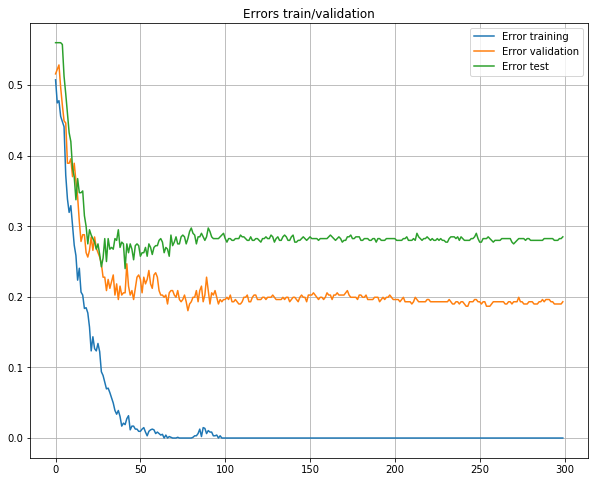

Performance train: 0.0
Performance validation: 0.192151898734
Performance test: 0.281433333333
37


  5%|▌         | 15/300 [00:00<00:02, 140.83it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.03it/s]


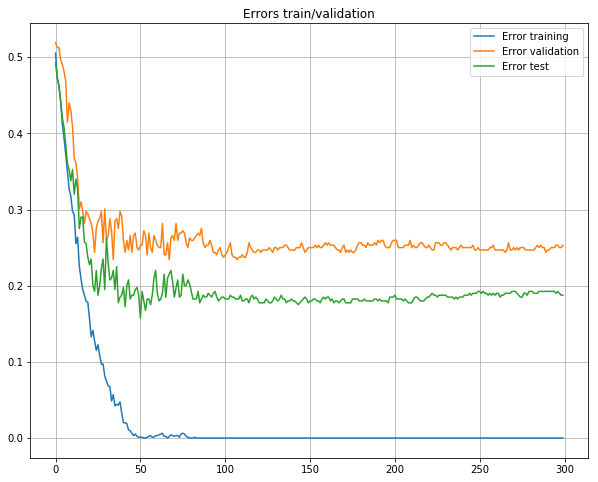

Performance train: 0.0
Performance validation: 0.249493670886
Performance test: 0.189066666667
38


  5%|▌         | 16/300 [00:00<00:01, 155.76it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 88.20it/s] 


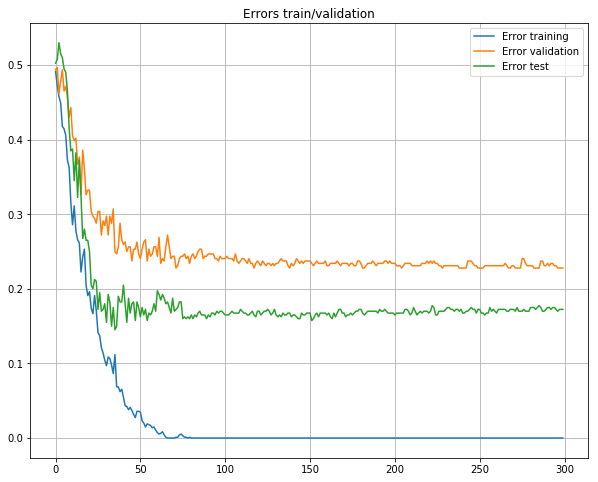

Performance train: 0.0
Performance validation: 0.230970464135
Performance test: 0.171566666667
39


  3%|▎         | 9/300 [00:00<00:03, 84.73it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:04<00:00, 67.59it/s]


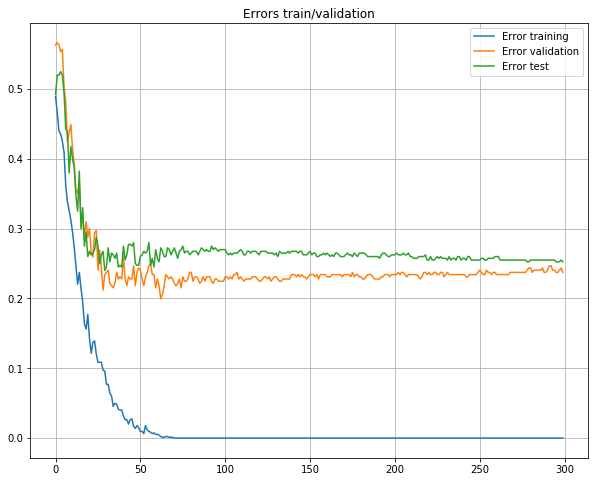

Performance train: 0.0
Performance validation: 0.236962025316
Performance test: 0.255933333333
40


  4%|▎         | 11/300 [00:00<00:02, 100.33it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.19it/s]


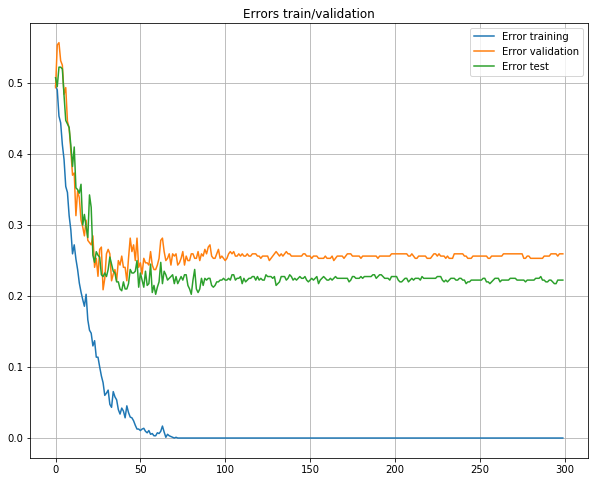

Performance train: 0.0
Performance validation: 0.256624472574
Performance test: 0.222666666667
41


  5%|▌         | 15/300 [00:00<00:01, 146.91it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 88.76it/s] 


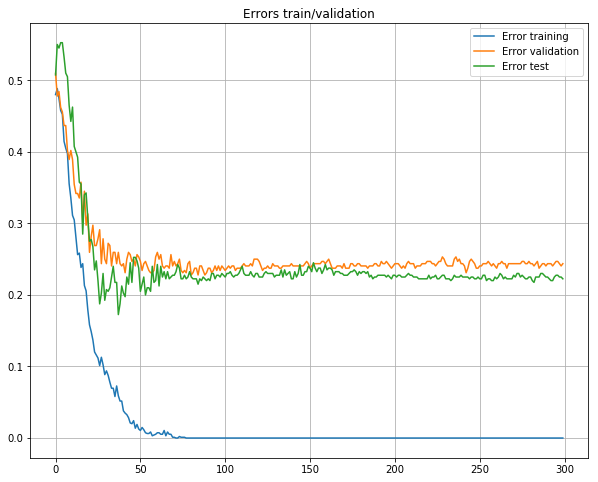

Performance train: 0.0
Performance validation: 0.243544303797
Performance test: 0.2244
42


  3%|▎         | 9/300 [00:00<00:03, 88.41it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:04<00:00, 72.71it/s]


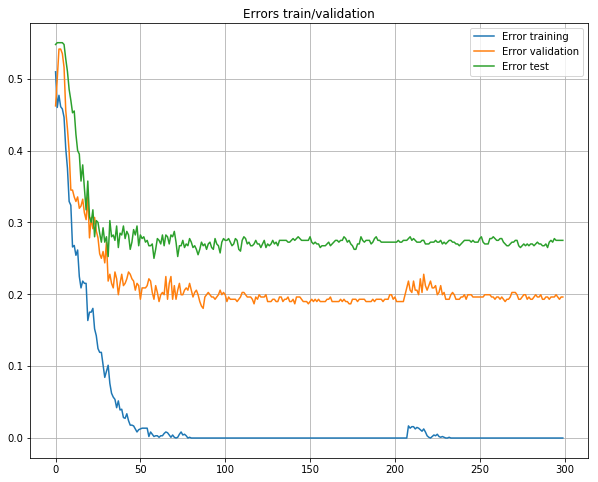

Performance train: 0.000168776371308
Performance validation: 0.196708860759
Performance test: 0.2723
43


  4%|▎         | 11/300 [00:00<00:02, 102.97it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 109.44it/s]


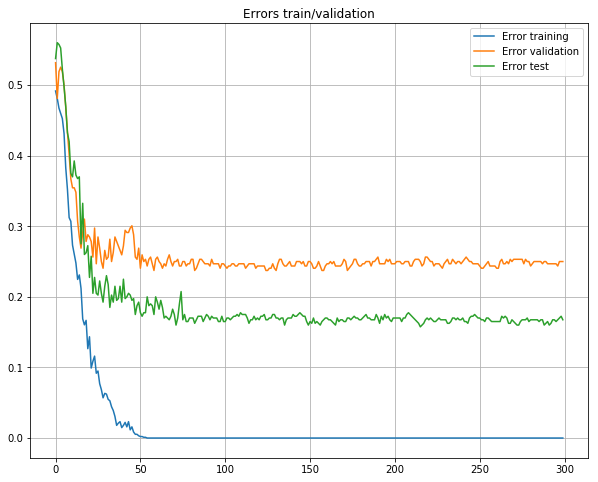

Performance train: 0.0
Performance validation: 0.248227848101
Performance test: 0.167
44


  5%|▌         | 15/300 [00:00<00:01, 145.31it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.00it/s]


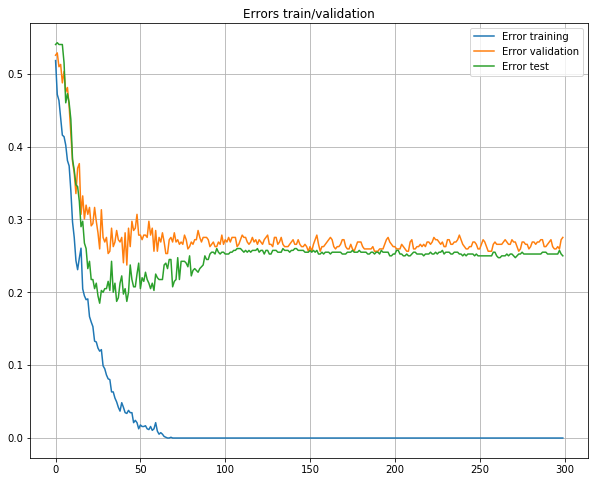

Performance train: 0.0
Performance validation: 0.266160337553
Performance test: 0.252233333333
45


  5%|▌         | 15/300 [00:00<00:01, 146.73it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.73it/s]


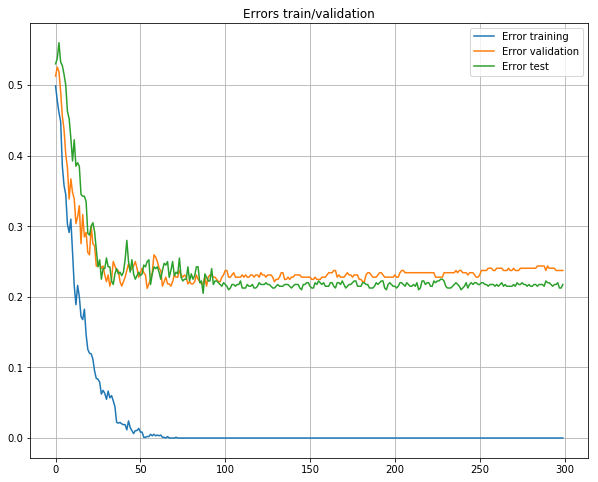

Performance train: 0.0
Performance validation: 0.237215189873
Performance test: 0.2172
46


  5%|▌         | 15/300 [00:00<00:01, 142.62it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 109.88it/s]


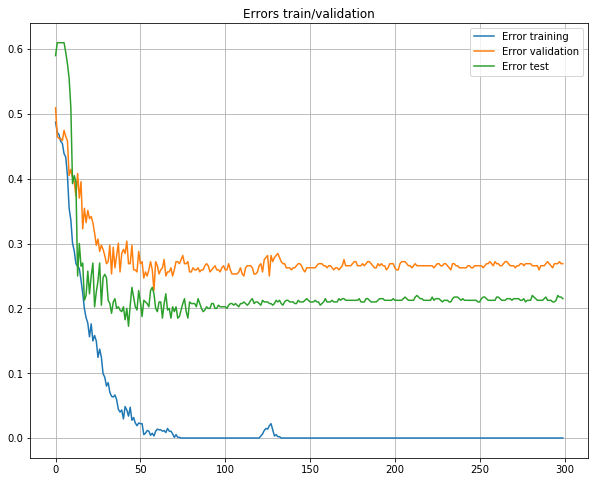

Performance train: 0.0
Performance validation: 0.266793248945
Performance test: 0.2138
47


  5%|▍         | 14/300 [00:00<00:02, 139.49it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.07it/s]


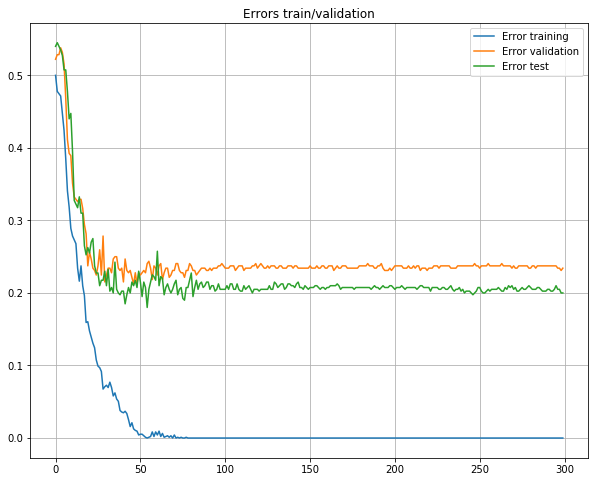

Performance train: 0.0
Performance validation: 0.236751054852
Performance test: 0.2047
48


  5%|▌         | 15/300 [00:00<00:02, 142.32it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.21it/s]


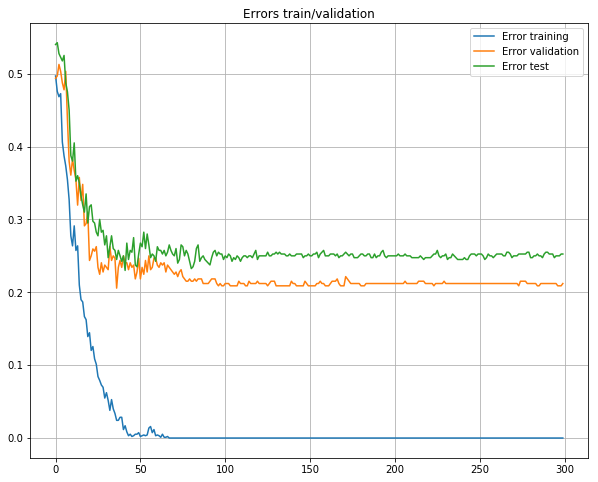

Performance train: 0.0
Performance validation: 0.211983122363
Performance test: 0.250433333333
49


  4%|▍         | 13/300 [00:00<00:02, 121.68it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.74it/s]


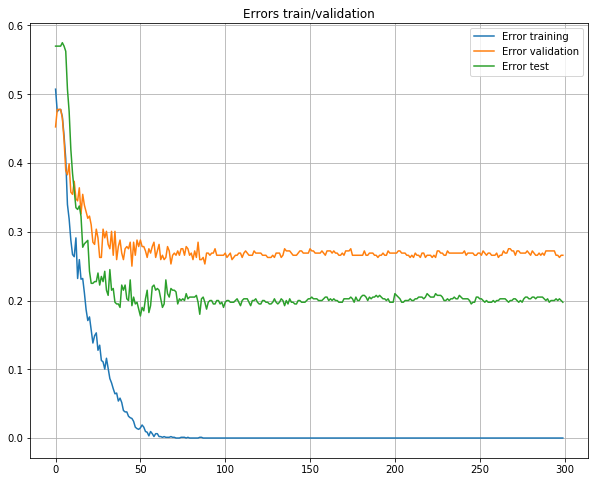

Performance train: 0.0
Performance validation: 0.268818565401
Performance test: 0.201633333333


In [24]:
results=[]
for i in range(50):
    print(i)
    train_dataset,train_target=load_script.load_dataset(train=True)
    test_dataset,test_target=load_script.load_dataset(train=False)
    
    dataset=torch.cat((train_dataset.data,test_dataset.data),0)
    target=torch.cat((train_target.data,test_target.data),0)
    permutations=torch.randperm(dataset.shape[0])
    dataset=dataset[permutations]
    target=target[permutations]
    train_dataset=Variable(dataset[:316])
    train_target=Variable(target[:316])
    test_dataset=Variable(dataset[316:])
    test_target=Variable(target[316:])
    mean=train_dataset.mean(0).mean(1).view(1,28,1)
    std=train_dataset.std(2).mean(0).view(1,28,1)
    train_dataset=(train_dataset-mean)/std
    test_dataset=(test_dataset-mean)/std
    
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)

    net_type=SingleCNNLayer
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=0,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [ ]:
params.network

In [ ]:
validation=[]
test=[]
for result in results:
    for experiment in result._experiments:
        validation.append(experiment._performance_validation)
        test.append(experiment._performance_test)

In [ ]:
np.mean(validation)

In [ ]:
np.mean(test)

In [ ]:
save=True
if save:
    file_name=folder.stored+'shuffle'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)